In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Custom imports
from utils import *

In [2]:
# Discretization parameters
dx = 0.01 # space
dt = 0.005 # time
a = 1


In [3]:
# We assume that the disturbance has a width of 1, and that it always starts at x = 1
 
x_start = 0
x_end = 15+dx

_x = np.arange(x_start, x_end, dx)

delta_x_ = 1 # Interval of the "disturbance"
t_start = 0

In [4]:
def top_hat(x, x_start, width):
    # Top hat parametrization
    # 2     ___
    #      |   |
    # 1 ___|   |___
    #   0  1   2  3

    if x_start <= x <= x_start + width:
        return 2
    else:
        return 1
    
u0_hat = np.array([top_hat(x, 1, 1) for x in _x])

In [5]:
def triang(x, x_start, width):
    # Triangular waveform parametrization
    #2       /\
    #       /  \ 
    #      /    \
    #1____/______\_____
    # 0   1      2    3

    mid = x_start + width/2
   
    if x_start <= x <= mid:
        return 2*x - 1
    elif mid < x <= x_start + width:
        return -2*x  + 5
    else:
        return 1

u0_wiz = np.array([triang(x, 1, 1) for x in _x])

In [6]:
def sine(x, x_start, width):
    # Sine waveform parametrization
    if x_start <= x <= x_start + width:
        return -np.sin(np.pi*x/width) + 1
    else:
        return 1
u0_sin = np.array([sine(x, 1, 1) for x in _x])

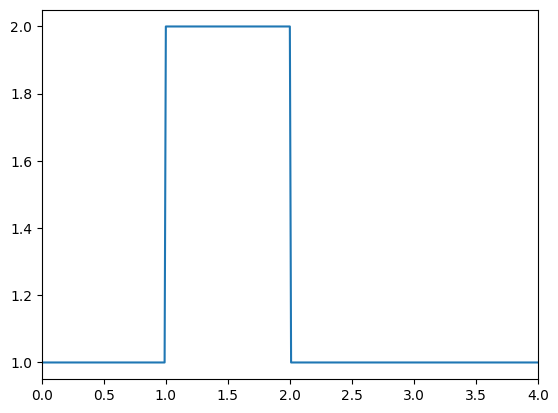

In [7]:
plt.figure()
plt.plot(_x, u0_hat, label="Top hat")
# limit x axis from 0  t0 4
plt.xlim(0, 4)


# save plot to Images folder
plt.savefig('Images/top_hat.png')
plt.show()


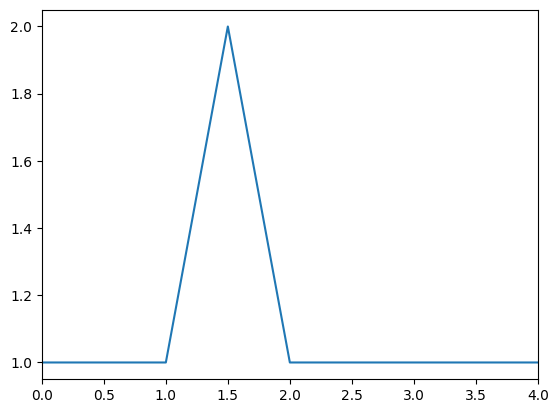

In [8]:
plt.figure()

plt.plot(_x, u0_wiz, label="Triangular")
plt.xlim(0, 4)
# save plot to Images folder
plt.savefig('Images/triang.png')
plt.show()


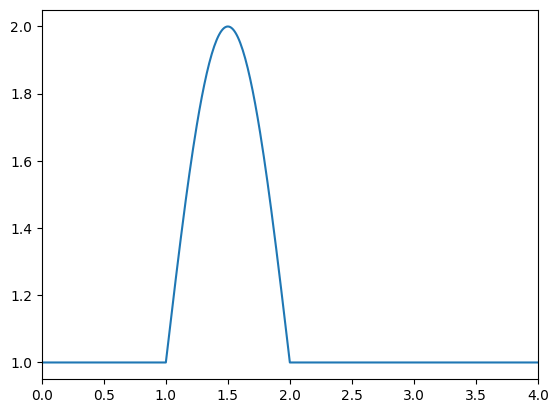

In [9]:
plt.figure()
plt.plot(_x, u0_sin, label="Sine")
plt.xlim(0, 4)
plt.savefig('Images/sine.png')
plt.show()



# Upwind method: Discussion and implementation

In [10]:
def propagate(u, dx, dt, lb, a=1, n_steps=1):
    # Propagate the disturbance
    #c = a*dt/dx
    c = a*dt/dx

    if np.abs(c) > 1:
        print(f"WARNING: CFL condition not met: {c}")
    u_prop = np.zeros((n_steps, len(u)))
    u_prop[0,:] = u
    for i in range(1, n_steps):
        u_new = u_prop[i,:]
        u_new[0] = lb
        for j in range(1,len(u)):
            u_new[j] = u[j] - c*(u[j] - u[j-1])
        # u_new avaible here, compute L1 and TV
        u = u_new
    return u_prop


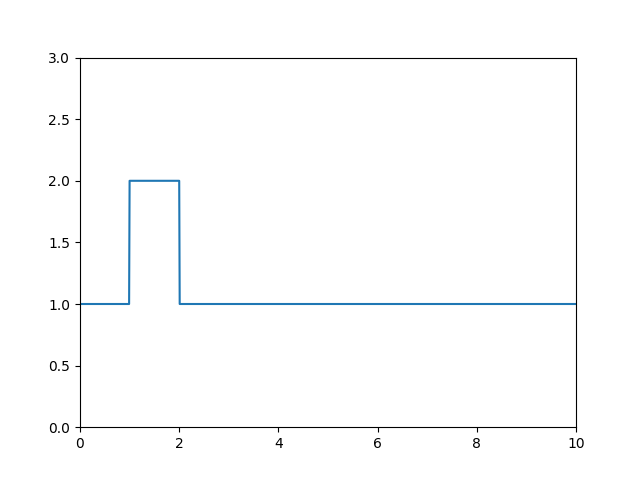

In [11]:
%matplotlib widget

u_prop_hat = propagate(u0_hat, dx, dt, 1, a, 2000)
top_hat = Result(_x, u_prop_hat, a*dt/dx, "Top hat")
anim = top_hat.animate()
plt.show()

In [13]:

u_prop_wiz = propagate(u0_wiz, dx, dt, 1, a, 2000)
wiz = Result(_x, u_prop_wiz, a*dt/dx, "Wizard hat")


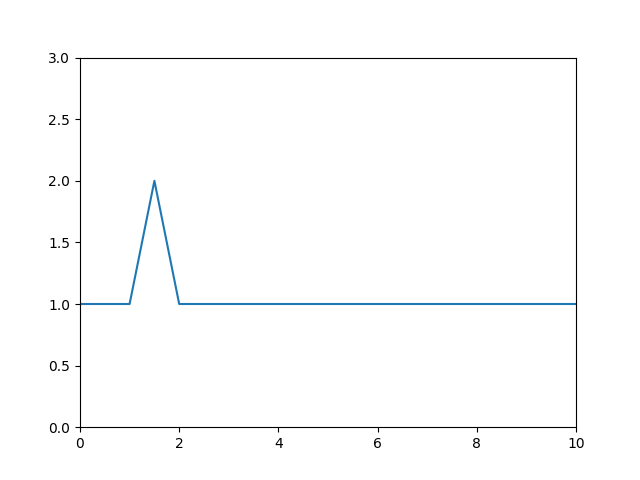

In [14]:
%matplotlib widget
anim = wiz.animate()
plt.show()

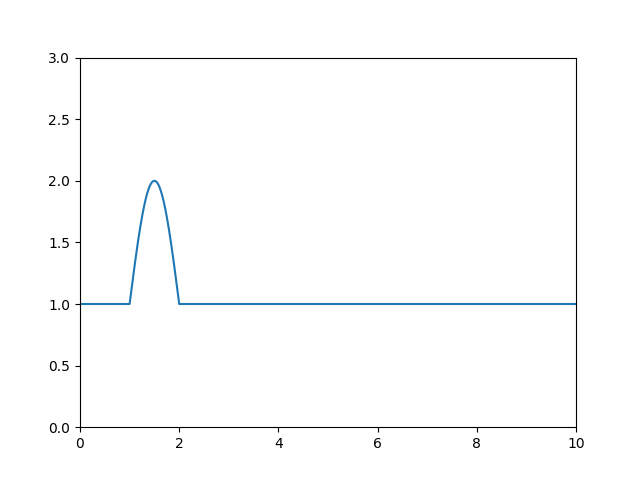

In [15]:
u_prop_sine = propagate(u0_sin, dx, dt, 1, a, 2000)
sin = Result(_x, u_prop_sine, a*dt/dx, "Sine")

%matplotlib widget
anim = sin.animate()
plt.show()

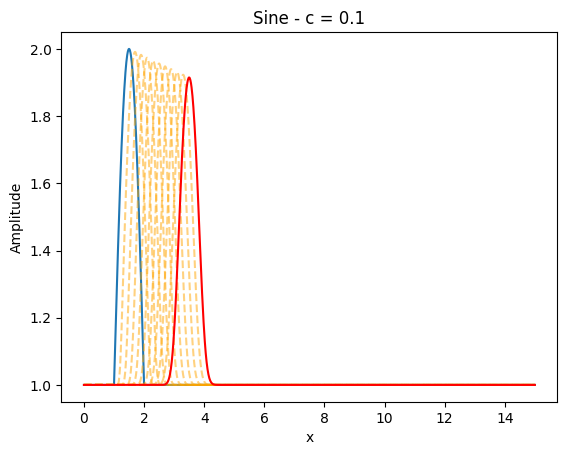

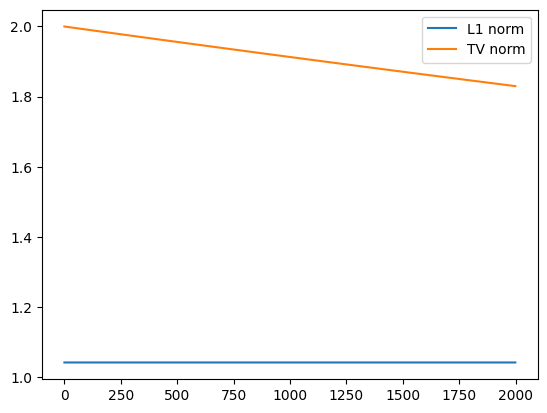

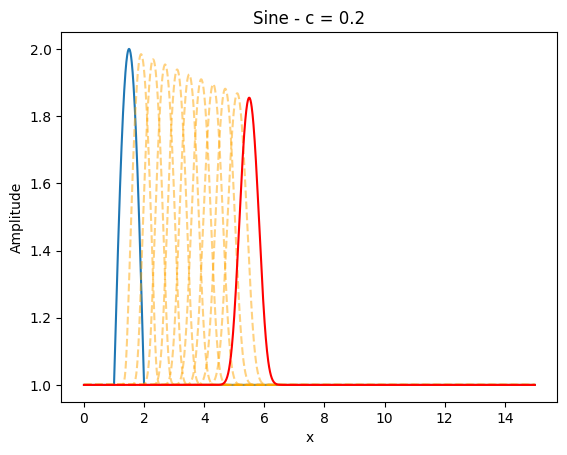

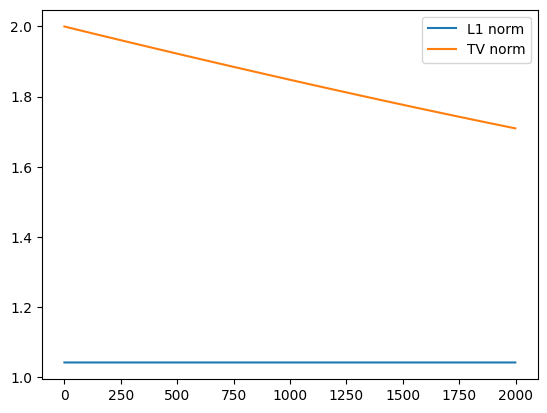

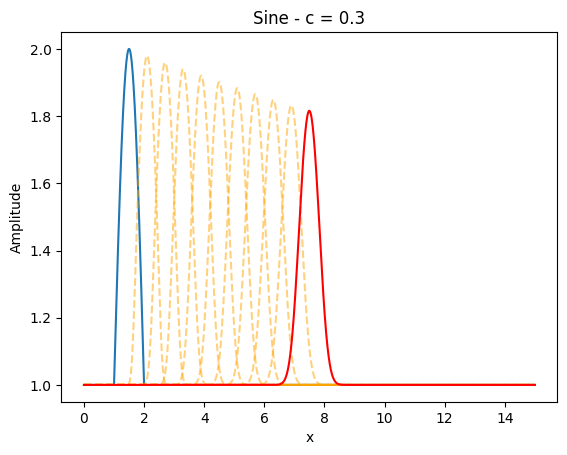

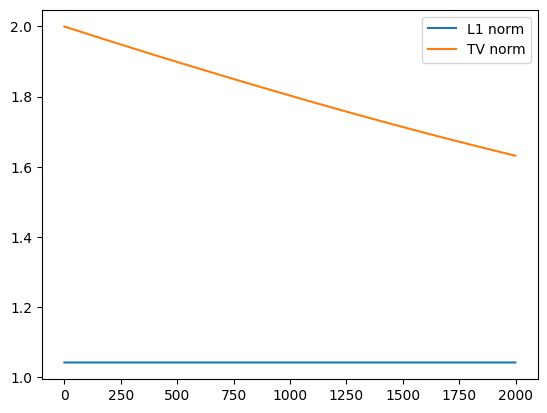

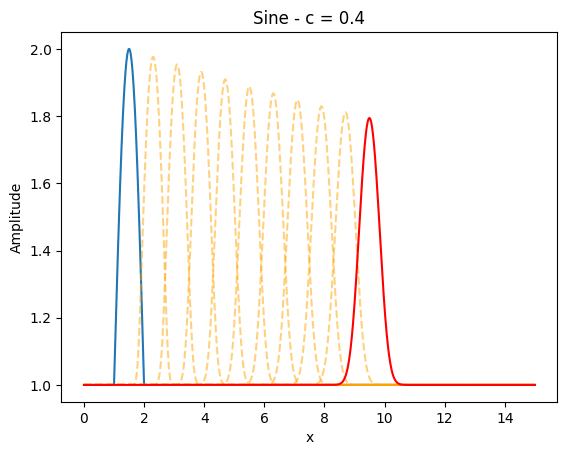

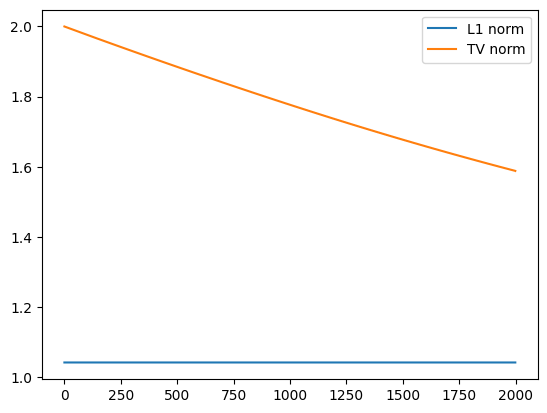

In [31]:
# Test several values of c, mantaining constant the time of propagation
c_values  = [0.1,0.2,0.3,0.4]

dt = 0.005 # meaning 10s for 2000 steps
# To obtain the same time of propagation, we need to adjust the time step
dx_values = [dt/c for c in c_values]
n_steps = 2000

# Propagate sine with all values of c
u_prop_arr = np.zeros((len(c_values), n_steps, len(_x)))
for i, c in enumerate(c_values):
    u_prop_arr[i] = propagate(u0_sin, dx_values[i], dt, 1, a, n_steps)

# Plot results  
for i, c in enumerate(c_values):
    res = Result(_x, u_prop_arr[i], c, f"Sine")
    res.plot(save=True)



In [32]:
print("Dt values: ", dt_values)

Dt values:  [0.001, 0.002, 0.003, 0.004]
